In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from typing_extensions import Text
dataset= pd.read_csv('/content/drive/MyDrive/4-1_Semester/CSE-404/Testing/Nashra/CAR-DETAILS-FROM-CAR-DEKHO.csv')
list_drop = ['name']
dataset.drop(list_drop, axis=1, inplace=True)
dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
pd.unique(dataset['fuel'])

array([2, 3, 4, 5, 'Electric'], dtype=object)

In [11]:
dataset["fuel"].replace({'Petrol':2, 'Diesel':3, 'CNG':4, 'LPG':5, 'Electric':6},inplace = True)
dataset["seller_type"].replace({'Dealer':2, 'Individual':3, 'Trustmark Dealer':4}, inplace = True)
dataset["transmission"].replace({'Manual':2, 'Automatic':3}, inplace = True)
dataset["owner"].replace({'First Owner': 5, 'Second Owner': 4, 'Third Owner': 3,'Fourth & Above Owner': 2,'Test Drive Car': 1}, inplace = True)
dataset.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,2,3,2,5
1,2007,135000,50000,2,3,2,5
2,2012,600000,100000,3,3,2,5
3,2017,250000,46000,2,3,2,5
4,2014,450000,141000,3,3,2,4


In [20]:
dataset.describe(include = 'all')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.00000
mean,2013.090783,5.041273e+05,66215.777419,2.531336,2.794470,2.103226,4.53341
std,4.215344,5.785487e+05,46644.102194,0.549621,0.458629,0.304289,0.74033
min,1992.000000,2.000000e+04,1.000000,2.000000,2.000000,2.000000,1.00000
25%,2011.000000,2.087498e+05,35000.000000,2.000000,3.000000,2.000000,4.00000
50%,2014.000000,3.500000e+05,60000.000000,3.000000,3.000000,2.000000,5.00000
75%,2016.000000,6.000000e+05,90000.000000,3.000000,3.000000,2.000000,5.00000
max,2020.000000,8.900000e+06,806599.000000,6.000000,4.000000,3.000000,5.00000


In [12]:
x= dataset[['year','seller_type','km_driven','fuel','transmission','owner']].values
y= dataset['selling_price'].values

print(x.shape, y.shape)

(4340, 6) (4340,)


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3472, 6) (3472,)
(868, 6) (868,)


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print(model.coef_)
print('----------')
print("Model Accuracy: ",model.score(X_test, y_test))

[ 3.79497893e+04 -2.21048768e+04 -8.56560288e-01  2.35124680e+05
  8.66672792e+05  1.92049612e+04]
----------
Model Accuracy:  0.4772019874558958


In [15]:
i=1
while True:
  X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.2)
  model.fit(X_train, y_train)
  print(i, end=" ")
  i+=1
  print("----------",model.score(X_test, y_test))
  if model.score(X_test,y_test)>0.50:
    break

# Max got 38076/ 0.68

1 ---------- 0.43424099470584543
2 ---------- 0.40955422296439015
3 ---------- 0.4569855966600632
4 ---------- 0.39735295018511607
5 ---------- 0.43675280712491094
6 ---------- 0.4546566038219134
7 ---------- 0.38888816497540113
8 ---------- 0.4304232244137337
9 ---------- 0.4235987502516918
10 ---------- 0.38382964360057215
11 ---------- 0.4687138698038903
12 ---------- 0.4266997560413214
13 ---------- 0.4079175916458625
14 ---------- 0.39670694526169625
15 ---------- 0.36676523904552927
16 ---------- 0.4831887719572475
17 ---------- 0.47865506753176856
18 ---------- 0.46205004340179134
19 ---------- 0.4719137991630551
20 ---------- 0.36495608214261566
21 ---------- 0.4991017965077703
22 ---------- 0.3878483402279981
23 ---------- 0.43783262537138057
24 ---------- 0.4417451531721437
25 ---------- 0.40509125018806824
26 ---------- 0.43849642117515286
27 ---------- 0.4064205807243467
28 ---------- 0.4482959876556539
29 ---------- 0.38696191570703464
30 ---------- 0.36232063696251615
31 

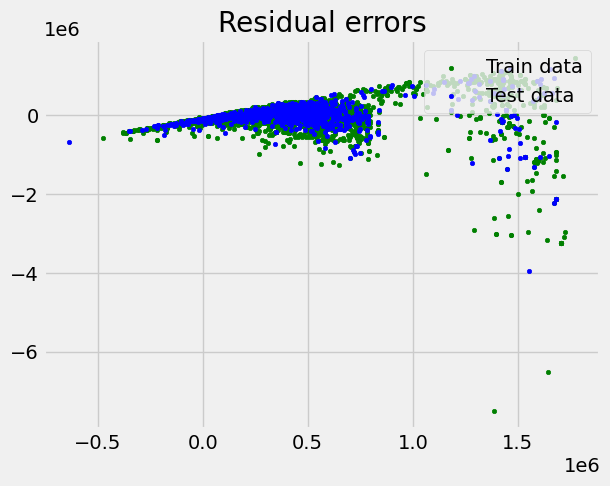

<Figure size 1200x600 with 0 Axes>

In [16]:
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')


## plotting line for zero residual error
#plt.hlines(y = 0, xmin = 0, xmax = 2.1, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")

plt.figure(figsize=(12,6))

## method call for showing the plot
plt.show()


In [17]:
acc=model.score(X_test, y_test)

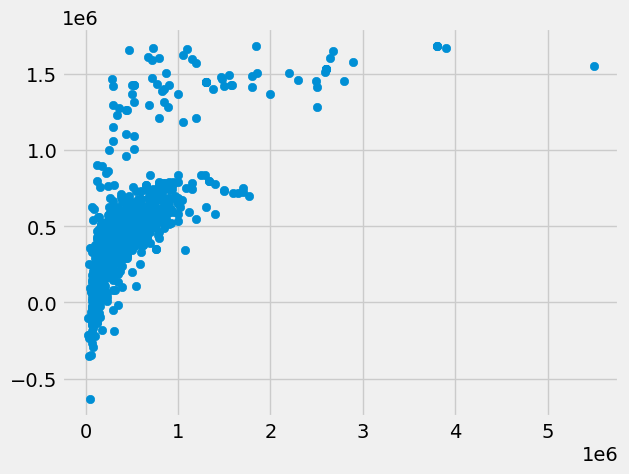

In [18]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)

In [19]:
for i in range(len(predictions)):
  print('selling_price predict : '+str(predictions[i])  ,'\t','ACTUAL    selling_price: '+str(y_test[i]))
print(acc)

selling_price predict : 1060856.8577918857 	 ACTUAL    selling_price: 300000
selling_price predict : 574180.1292028427 	 ACTUAL    selling_price: 550000
selling_price predict : 449989.1808363646 	 ACTUAL    selling_price: 199000
selling_price predict : -137645.83059504628 	 ACTUAL    selling_price: 125000
selling_price predict : 607315.544730857 	 ACTUAL    selling_price: 500000
selling_price predict : 122269.71888552606 	 ACTUAL    selling_price: 114999
selling_price predict : 377589.02882513404 	 ACTUAL    selling_price: 625000
selling_price predict : 529796.1875457764 	 ACTUAL    selling_price: 550000
selling_price predict : 445922.26931114495 	 ACTUAL    selling_price: 434999
selling_price predict : 1283718.4241361618 	 ACTUAL    selling_price: 2500000
selling_price predict : 403018.96196073294 	 ACTUAL    selling_price: 350000
selling_price predict : 82990.54572862387 	 ACTUAL    selling_price: 195000
selling_price predict : 458126.15457482636 	 ACTUAL    selling_price: 350000
sel